[[[255 255 255]
  [255 255 255]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 ...

 [[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [250 250 250]
  [255 255 255]]

 [[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]]


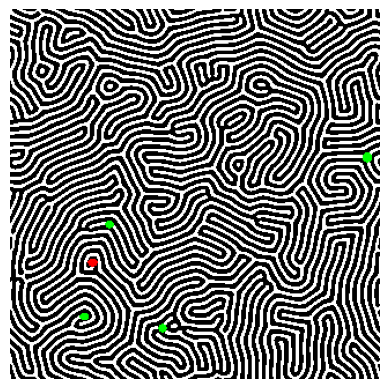

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def discretize_image(image_path, pixel_size):
    image = Image.open(image_path)
    image = image.convert('RGB')

    image_array = np.array(image)
    height, width, _ = image_array.shape

    # Redimensionar la imagen
    height = height // pixel_size * pixel_size
    width = width // pixel_size * pixel_size
    image_array = image_array[:height, :width]

    discretized_height = height // pixel_size
    discretized_width = width // pixel_size
    discretized_img = np.zeros((discretized_height, discretized_width, 3), dtype=np.uint8)

    for i in range(0, height, pixel_size):
        for j in range(0, width, pixel_size):
            region = image_array[i:i+pixel_size, j:j+pixel_size, :]
            
            # Tomar el color del primer píxel de la región
            discretized_img[i//pixel_size, j//pixel_size, :] = region[0, 0, :]

            # Identificar y cambiar píxeles grises a negro por su código RGB
            if np.all(region[0, 0, :] >= 0) and np.all(region[0, 0, :] <= 225):
                discretized_img[i//pixel_size, j//pixel_size, :] = [0, 0, 0]  # Cambiar a color negro

    return discretized_img

def plot_discretized_image(discretized_img):
    plt.imshow(discretized_img)
    plt.axis('off')
    plt.show()

# Ruta de la imagen y tamaño de píxel deseado
image_path = "turing.bmp"
pixel_size = 2  # Ajusta el tamaño del píxel según sea necesario

# Recomendación por imagen
# Para Prueba Lab1.bmp usar 30px y colocar marco negro alrededor URGENTE
# Para Test.bmp usar 20px y colocar marco negro alrededor URGENTE
# Para Test.bmp usar 30px y colocar marco negro alrededor URGENTE
# Para turing.bmp usar 2px y colocar marco negro alrededor URGENTE


# Discretizar la imagen
discretized_img = discretize_image(image_path, pixel_size)
# print(discretized_img)

# Visualizar la imagen discretizada
plot_discretized_image(discretized_img)
